In [1]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r data
%store -r target

In [3]:
data = standardize(data)
X_dev, y_dev, X_test, y_test, X_train, y_train, X_val, y_val = split(data,target)

X_train shape: (8091, 51)
X_test shape: (999, 51)
X_val shape: (900, 51)
y_train shape: (8091,)
y_test shape: (999,)
y_val shape: (900,)


### Original Model
Building a model with no parameter tuning and using the raw csv file

In [4]:
model_lr = LogisticRegression()
model_lr.fit(X_dev, y_dev)
predsDevlr = model_lr.predict(X_dev)
predsTestlr = model_lr.predict(X_test)

In [5]:
testlr_score =  accuracy_score(y_test, predsTestlr)
devlr_score = accuracy_score(y_dev, predsDevlr)

In [6]:
print("Classification Score for Logistic Regression on Dev dataset:\n")
print("Dev Score : ", devlr_score)
print(classification_report(y_dev, predsDevlr))
print("--------------------------------------------------------")
print("Classification Score for Logistic Regression on Test dataset:\n")
print("Test Score :", testlr_score)
print(classification_report(y_test, predsTestlr))

Classification Score for Logistic Regression on Dev dataset:

Dev Score :  0.6922478033589144
              precision    recall  f1-score   support

       blues       0.61      0.67      0.64       904
   classical       0.87      0.92      0.89       894
     country       0.61      0.59      0.60       886
       disco       0.64      0.58      0.61       890
      hiphop       0.70      0.60      0.65       901
        jazz       0.75      0.77      0.76       886
       metal       0.75      0.87      0.80       923
         pop       0.77      0.81      0.79       896
      reggae       0.64      0.64      0.64       904
        rock       0.55      0.48      0.51       907

    accuracy                           0.69      8991
   macro avg       0.69      0.69      0.69      8991
weighted avg       0.69      0.69      0.69      8991

--------------------------------------------------------
Classification Score for Logistic Regression on Test dataset:

Test Score : 0.684684684684

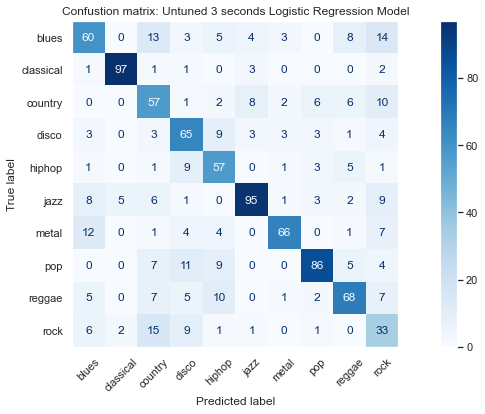

Accuracy : 0.68
Macro F-1 Score : 0.68


In [7]:
# Evaluate Model on Test set
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(predsTestlr, y_test, class_labels, 'Confustion matrix: Untuned 3 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the raw csv file

In [8]:
parameters = {'C': np.linspace(0.1,100,5)}
print(parameters)

{'C': array([  0.1  ,  25.075,  50.05 ,  75.025, 100.   ])}


In [9]:
tune_lr = GridSearchCV(estimator = model_lr, param_grid = parameters, cv = 5)
tune_lr.fit(X_dev, y_dev)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([  0.1  ,  25.075,  50.05 ,  75.025, 100.   ])})

In [10]:
print("Best Score :", tune_lr.best_score_)
print("Best Parameters :",tune_lr.best_params_)

Best Score : 0.6924704801394422
Best Parameters : {'C': 50.050000000000004}


In [11]:
predsDevlr_tuned = tune_lr.predict(X_dev)
predsTestlr_tuned = tune_lr.predict(X_test)

print("Score on Dev data for LR using GridSearchCV:", accuracy_score(y_dev, predsDevlr_tuned))
print("Score on Test data for LR using GridSearchCV:",accuracy_score(y_test, predsTestlr_tuned))

Score on Dev data for LR using GridSearchCV: 0.7087087087087087
Score on Test data for LR using GridSearchCV: 0.6946946946946947


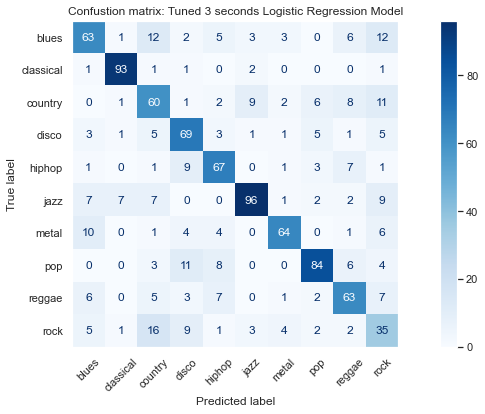

Accuracy : 0.69
Macro F-1 Score : 0.69


In [12]:
# Evaluate Model on Test set
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(predsTestlr_tuned, y_test, class_labels, 'Confustion matrix: Tuned 3 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Dimensionality reduction of data using PCA

In [13]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=30)
# fit on data
pca_data = pca.fit_transform(X_dev)
pca_data_test = pca.transform(X_test)
# pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_dev.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_dev], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance of each component: [0.11454404 0.08920634 0.04504717 0.02937379 0.02274578 0.0199205
 0.01584086 0.01368273 0.01132293 0.01090893 0.0089262  0.00814799
 0.00722979 0.00684101 0.00622569 0.00604715 0.00535506 0.00529875
 0.00508264 0.0048305  0.00472013 0.00416857 0.00364296 0.00346742
 0.00329461 0.00306256 0.00283967 0.0028141  0.00272795 0.00269149]
Sum of Explained Variance: 0.9368384152240434


In [14]:
pca_final.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,-0.262197,-0.041290,-0.004825,0.077376,-0.092647,-0.202191,0.134132,-0.029621,0.065915,0.012883,...,-0.035611,0.006293,-0.060757,-0.057251,-0.024601,0.001295,0.002821,0.002788,-0.035544,blues
1,0.911816,0.656705,0.093061,0.041841,0.162398,-0.345908,-0.111054,0.005578,0.107241,0.058342,...,0.020845,-0.116975,0.041090,0.041639,0.027345,-0.079572,0.057874,0.112615,-0.019797,pop
2,-0.346865,0.190015,-0.015068,-0.042262,0.002092,-0.081455,-0.064500,-0.077149,-0.020668,-0.082211,...,-0.024266,0.040965,0.010742,-0.004683,0.055059,-0.018182,-0.031446,-0.003985,-0.034040,rock
3,0.165602,-0.054123,-0.230414,-0.096289,0.254819,0.184295,-0.224989,0.077987,-0.083908,-0.040342,...,0.058507,0.028529,0.052504,0.004080,-0.012268,0.030760,-0.132892,-0.017205,-0.061873,jazz
4,-0.213596,0.153496,0.162250,0.171556,0.164250,-0.038907,0.033232,0.036492,0.089954,0.132915,...,0.094461,0.053923,0.076093,-0.045967,-0.000916,-0.050054,-0.032376,-0.009223,-0.037891,hiphop


### PCA - Original Model
Building a model with no parameter tuning and using the PCA data

In [15]:
model_pca = model_lr
model_pca.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainlr = model_pca.predict(pca_data)
pcaTestlr = model_pca.predict(pca_data_test)

In [16]:
pcatestlr_score =  accuracy_score(y_test, pcaTestlr)
pcalr_score = accuracy_score(y_dev, pcaTrainlr)

In [17]:
print("Classification Score for Logistic Regression on Train dataset:\n")
print("Train Score : ", pcalr_score)
print("--------------------------------------------------------")
print("Classification Score for Logistic Regression on Test dataset:\n")
print("Test Score :", pcatestlr_score)

Classification Score for Logistic Regression on Train dataset:

Train Score :  0.6612167723278835
--------------------------------------------------------
Classification Score for Logistic Regression on Test dataset:

Test Score : 0.6626626626626627


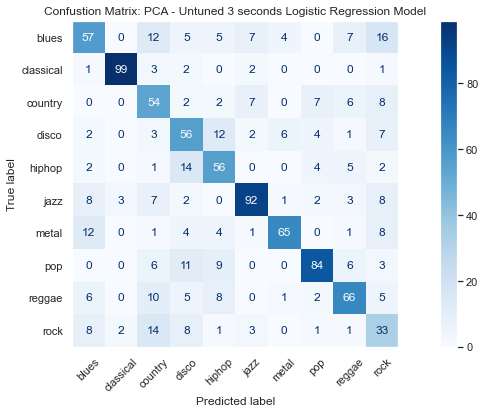

Accuracy : 0.66
Macro F-1 Score : 0.65


In [18]:
# Evaluate Model
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(pcaTestlr, y_test, class_labels, 'Confustion Matrix: PCA - Untuned 3 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### PCA - Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the PCA data

In [19]:
pca_final.iloc[:,:30]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.262197,-0.041290,-0.004825,0.077376,-0.092647,-0.202191,0.134132,-0.029621,0.065915,0.012883,...,-0.010893,-0.035611,0.006293,-0.060757,-0.057251,-0.024601,0.001295,0.002821,0.002788,-0.035544
1,0.911816,0.656705,0.093061,0.041841,0.162398,-0.345908,-0.111054,0.005578,0.107241,0.058342,...,0.005539,0.020845,-0.116975,0.041090,0.041639,0.027345,-0.079572,0.057874,0.112615,-0.019797
2,-0.346865,0.190015,-0.015068,-0.042262,0.002092,-0.081455,-0.064500,-0.077149,-0.020668,-0.082211,...,-0.049168,-0.024266,0.040965,0.010742,-0.004683,0.055059,-0.018182,-0.031446,-0.003985,-0.034040
3,0.165602,-0.054123,-0.230414,-0.096289,0.254819,0.184295,-0.224989,0.077987,-0.083908,-0.040342,...,-0.023595,0.058507,0.028529,0.052504,0.004080,-0.012268,0.030760,-0.132892,-0.017205,-0.061873
4,-0.213596,0.153496,0.162250,0.171556,0.164250,-0.038907,0.033232,0.036492,0.089954,0.132915,...,-0.051111,0.094461,0.053923,0.076093,-0.045967,-0.000916,-0.050054,-0.032376,-0.009223,-0.037891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,0.223969,0.199646,-0.304657,0.107035,0.128514,-0.077396,0.112850,-0.020107,-0.039324,0.079149,...,-0.061013,0.003381,0.040916,0.021281,0.063883,-0.029514,0.040250,0.035417,0.060816,0.019711
8987,-0.606602,0.172697,-0.153625,0.181308,-0.121463,0.157416,0.025888,0.059123,-0.051092,-0.138441,...,-0.001094,-0.033900,-0.049192,0.007509,-0.007776,-0.022334,-0.017341,-0.052580,-0.018377,0.040866
8988,-0.049191,0.533015,0.390142,-0.164060,0.121949,0.004292,0.132506,-0.029931,0.190398,0.052231,...,0.008815,0.095474,0.102822,-0.005803,0.010986,0.098468,0.006547,-0.104599,-0.061642,0.069577
8989,0.060511,-0.364952,-0.044975,-0.081345,-0.295757,-0.073176,-0.190961,-0.031107,-0.108395,0.086481,...,-0.088531,-0.007513,0.000978,-0.063454,-0.037808,0.153383,0.008912,-0.029062,-0.025881,-0.036575


In [20]:
model_pca_tuned = tune_lr
model_pca_tuned.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainlr_tuned = model_pca_tuned.predict(pca_data)
pcaTestlr_tuned = model_pca_tuned.predict(pca_data_test)

In [21]:
pcatestlr_score =  accuracy_score(y_test, pcaTestlr_tuned)
pcalr_score = accuracy_score(y_dev, pcaTrainlr_tuned)

In [22]:
print("Classification Score for Logistic Regression on Train dataset:\n")
print("Train Score : ", pcalr_score)
print("--------------------------------------------------------")
print("Classification Score for Logistic Regression on Test dataset:\n")
print("Test Score :", pcatestlr_score)

Classification Score for Logistic Regression on Train dataset:

Train Score :  0.6760093426760093
--------------------------------------------------------
Classification Score for Logistic Regression on Test dataset:

Test Score : 0.6776776776776777


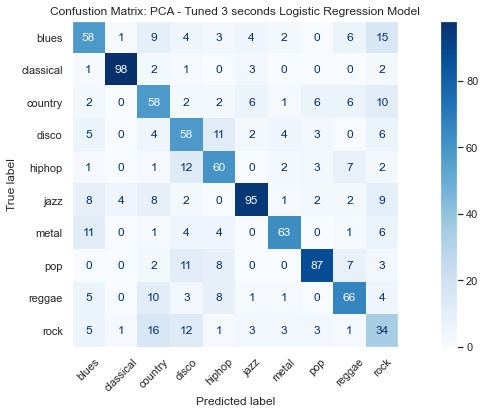

Accuracy : 0.68
Macro F-1 Score : 0.67


In [23]:
# Evaluate Model
class_labels = list(model_lr.classes_)
macro_f1, accuracy = evaluate_model(pcaTestlr_tuned, y_test, class_labels, 'Confustion Matrix: PCA - Tuned 3 seconds Logistic Regression Model')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)